# BIG DATA IN FINANCE 2 ASSIGNMENT 1: GROUP ASSIGNMENT IN UNSUPERVISED LEARNING

## CIDS: 00818016, 01425786, 01069962, 01448310. GROUP 6.

## SETTING UP THE DATA

In [1]:
# First load the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib
from sklearn.metrics import log_loss
%matplotlib inline

In [2]:
# Then load the data
data = pd.read_csv("Loan_data.csv")
data.head()


,id,loan_status,loan_amnt,term,int_rate,grade,sub_grade,installment,pymnt_plan,annual_inc,...,pub_rec_bankruptcies,revol_bal,revol_util,tax_liens,tot_cur_bal,tot_hi_cred_lim,total_acc,total_bal_ex_mort,total_bal_il,total_bc_limit
0,126413292,Current,25000,60,12.62,2,10,563.98,0,245000.0,...,0,52720,72.8,0,764635,1040248,33,144382,69591,39600
1,126419328,Current,10000,36,9.44,1,5,320.05,0,54000.0,...,1,8997,43.9,0,10313,36292,24,10313,1316,12500
2,126302604,Current,20000,36,6.72,0,2,614.99,0,400000.0,...,1,25104,44.0,0,234222,343611,38,43019,17915,45200
3,126367756,Current,27000,60,9.93,1,6,572.75,0,68000.0,...,0,19008,35.8,0,99838,166381,20,99838,80830,48500
4,126154990,Current,4000,36,10.42,1,7,129.86,0,115000.0,...,0,9021,33.7,0,22760,60716,20,22760,10240,21300


In [3]:
# Then retain only the columns that we want [loan_amnt, int_rate, annual_inc, avg_cur_bal, emp_length, fico_range_high,delinq_amnt, revol_util] and loan_status
data = data[['loan_status', 'loan_amnt', 'int_rate', 'annual_inc', 'avg_cur_bal', 'emp_length', 'fico_range_high','delinq_amnt', 'revol_util']]
data.head()

,loan_status,loan_amnt,int_rate,annual_inc,avg_cur_bal,emp_length,fico_range_high,delinq_amnt,revol_util
0,Current,25000,12.62,245000.0,36411,7,664,0,72.8
1,Current,10000,9.44,54000.0,2578,3,669,0,43.9
2,Current,20000,6.72,400000.0,13012,10,684,0,44.0
3,Current,27000,9.93,68000.0,7131,3,754,0,35.8
4,Current,4000,10.42,115000.0,2069,10,699,0,33.7


In [4]:
# Then set Current to 0 and Fail to 1
data['loan_status'] = data['loan_status'] == 'Fail' 
data['loan_status'] = data['loan_status'].apply(lambda x: int(x))
data.head()

,loan_status,loan_amnt,int_rate,annual_inc,avg_cur_bal,emp_length,fico_range_high,delinq_amnt,revol_util
0,0,25000,12.62,245000.0,36411,7,664,0,72.8
1,0,10000,9.44,54000.0,2578,3,669,0,43.9
2,0,20000,6.72,400000.0,13012,10,684,0,44.0
3,0,27000,9.93,68000.0,7131,3,754,0,35.8
4,0,4000,10.42,115000.0,2069,10,699,0,33.7


## QUESTION 1: COMPUTE AND VISUALISE PRINCIPAL COMPONENTS

In [5]:
# First get rid of the loan status column
data2 = data.drop(['loan_status'],axis=1)
# Scale the data before PCA
data3 = pd.DataFrame(scale(data2))
# Then define the PCA model and fit it onto the data
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data3)
print(pca_results)

[[ 1.37079926e+00  2.43814860e+00]
 [ 3.06932815e-01 -1.07797352e+00]
 [-2.88518078e-01  2.55067572e+00]
 ...
 [ 1.25395256e+00 -5.62560762e-01]
 [ 8.62966697e-04  6.35332628e-01]
 [ 1.40614521e+00 -7.48716138e-01]]


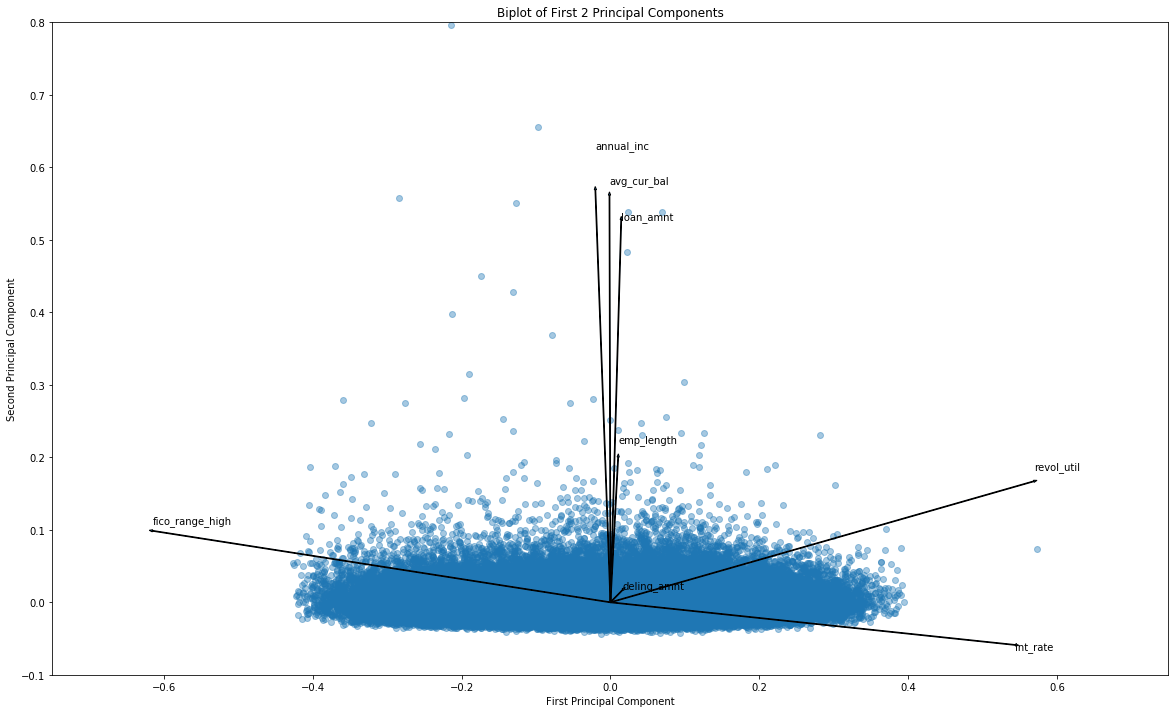

In [6]:
# Visualise the first 2 principal components using a biplot
biplotdata = pd.DataFrame(pca.components_[0:2],index=['PC1','PC2'],columns = data2.columns)
plt.figure(figsize=(20,12))
for i in data2.columns:
    plt.arrow(0,0,biplotdata.loc['PC1',i],biplotdata.loc['PC2',i])
    if i == 'loan_amnt':
        plt.text(biplotdata.loc['PC1',i],1*biplotdata.loc['PC2',i],i)
    elif i == 'avg_cur_bal':
        plt.text(biplotdata.loc['PC1',i],1.03*biplotdata.loc['PC2',i],i)
    else:
        plt.text(biplotdata.loc['PC1',i],1.1*biplotdata.loc['PC2',i],i)
plt.scatter(pca_results[:,0]/(pca_results[:,0].max() - pca_results[:,0].min()) ,pca_results[:,1]/(pca_results[:,1].max() - pca_results[:,1].min()),alpha = 0.4)   
plt.xlim(-0.75,0.75)
plt.ylim(-0.1,0.8)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Biplot of First 2 Principal Components')
plt.show()

There is more variation in the data in the plane parallel to the first principle component. Variation arises primarily from differences between the interest rate of the loan (int_rate), the borrower's FICO score (fico_range_high) and the revolving line utilization rate (revol_util). There is slightly less variation in the data in the plane parallel to the second principal component, the variation can mostly be attributed to the diferrences between the loan amount (loan_amnt), borrower's annual income (annual_inc) and the average current balance of all the borrower's accounts (avg_cur_bal). 

## QUESTION 2: VISUALISE VARIATION

In [7]:
# First compute the first 8 principal components
pca8comp = PCA(n_components=8)
new_pca_results = pca8comp.fit_transform(data3)
# Then compute the variance explained by each principal component and create a table
variance = pca8comp.explained_variance_ratio_
variance = np.array(variance)*100
cum_variance = np.cumsum(variance)
variance_table = pd.DataFrame(data=[variance],index = (['% of Var explained by']),columns = ['PC'+str(i) for i in range(1,9)]).round(3)
variance_table


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
% of Var explained by,23.221,19.515,12.507,12.311,10.497,9.258,7.457,5.233


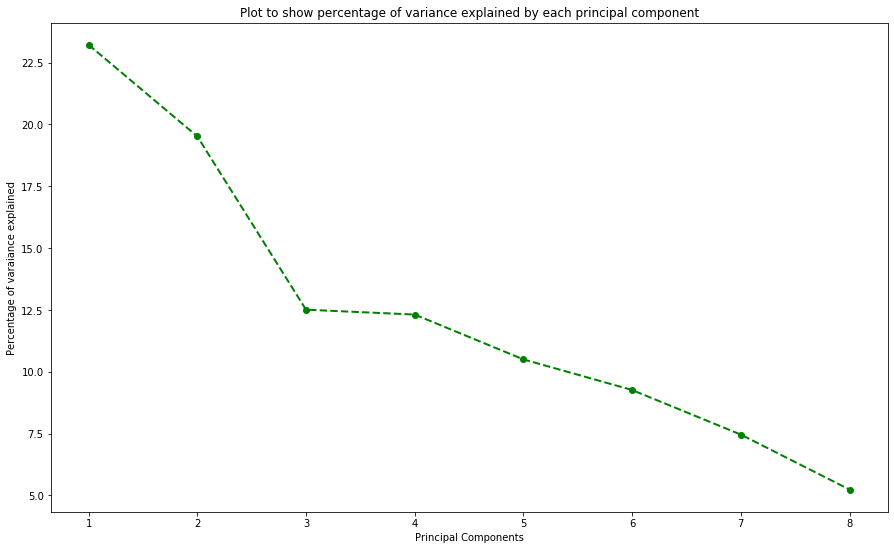

In [8]:
# Plot of variance explained by each principal component
X = [1,2,3,4,5,6,7,8]
plt.figure(figsize=(15,9))
plt.plot(X,variance,'go--', linewidth=2, markersize=6)   
plt.xlabel('Principal Components')
plt.ylabel('Percentage of varaiance explained')
plt.title('Plot to show percentage of variance explained by each principal component')
plt.show()

In [9]:
# Then create a table of the cumulative variance
cumulative_variance_table = pd.DataFrame(data=([cum_variance]),index = (['% Cumulative explained variance']),columns = ['PC'+str(i) for i in range(1,9)]).round(3)
cumulative_variance_table

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
% Cumulative explained variance,23.221,42.737,55.244,67.555,78.052,87.31,94.767,100.0


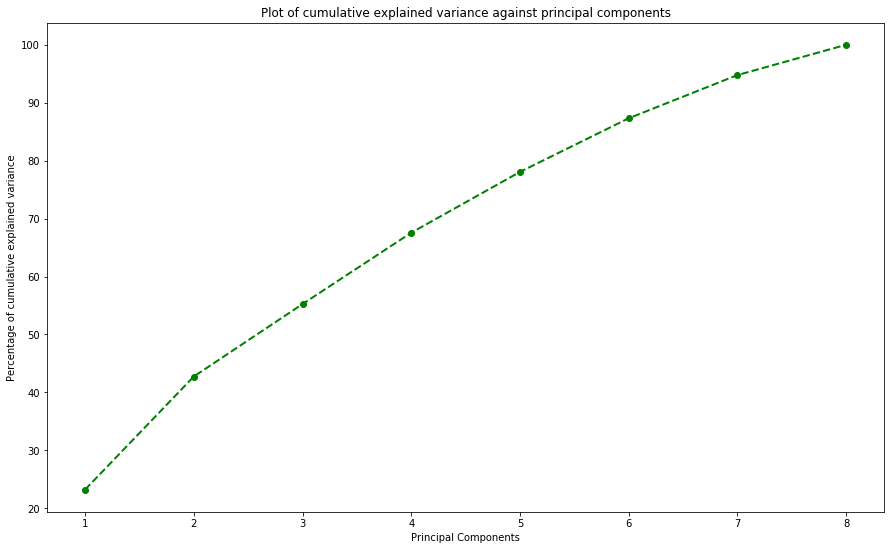

In [10]:
# Plot of cumulative variance for each principal component
plt.figure(figsize=(15,9))
plt.plot(X,cum_variance,'go--', linewidth=2, markersize=6)   
plt.xlabel('Principal Components')
plt.ylabel('Percentage of cumulative explained variance')
plt.title('Plot of cumulative explained variance against principal components')
plt.show()

If all 8 principal components were included then 100% of the variance can be explained. However, dimension reduction can reduce the scope of complexity of the classification problem. From the graphs and tables above we can see that approximately 80% of the varince can be explained by the first 5 principal components. Therefore we conclude that retaining the first 5 principal components should be sufficient to train the classifier. This would be sufficient if looking at Logistic Regression, however, for other classification models e.g. decision tree classifiers more principal components may be required.
Note also that each of the 8 principal components explains some of the variance and each principal component explains less variance than its predecessor.

## QUESTIONS 3 AND 4: USING PRINCIPAL COMPONENTS AS PREDICTORS AND TUNING THE NUMBER OF PRINCIPAL COMPONENTS USED FOR PREDICTION

In [11]:
# Preparing the data
new_data = pd.concat([data['loan_status'],data3],axis=1)
new_data.columns = data.columns
new_data.head()            

,loan_status,loan_amnt,int_rate,annual_inc,avg_cur_bal,emp_length,fico_range_high,delinq_amnt,revol_util
0,0,0.935457,-0.046571,1.923776,1.276582,0.341514,-1.273577,-0.01253,1.117689
1,0,-0.562394,-0.668581,-0.330802,-0.664281,-0.704685,-1.133867,-0.01253,-0.033335
2,0,0.436173,-1.200615,3.753406,-0.065724,1.126164,-0.714737,-0.01253,-0.029352
3,0,1.135171,-0.572737,-0.165545,-0.403094,-0.704685,1.241201,-0.01253,-0.355940
4,0,-1.161534,-0.476892,0.389247,-0.693480,1.126164,-0.295608,-0.01253,-0.439579


In [12]:
# Then split the data randomly for 80% training, 10% validation and 10% test
# First set the seed
np.random.seed(5)
train, remainder = train_test_split(new_data,test_size=0.2)
validate, test = train_test_split(remainder,test_size=0.5)

In [13]:
# First undersample non-defaulters so the defaulters and non-defaulters make up 50% each of the total data
Total_Nondefaulters = train[train.loan_status==0].index
Random_selection_nondef = np.random.choice(Total_Nondefaulters, sum(train.loan_status==1), replace=False)
Non_defaulters_sample = train.loc[Random_selection_nondef]
New_train = pd.concat([Non_defaulters_sample, train[train.loan_status==1]])
New_train.columns = data.columns
New_train.head()

,loan_status,loan_amnt,int_rate,annual_inc,avg_cur_bal,emp_length,fico_range_high,delinq_amnt,revol_util
77393,0,-0.212895,-0.476892,-0.012092,-0.273619,-0.966234,-0.854447,-0.01253,0.436633
84198,0,-0.762107,-1.077387,0.153165,-0.680917,1.126164,0.542652,-0.01253,-1.295877
68011,0,-0.662250,-0.956114,-0.259977,-0.597794,-0.443135,0.123522,-0.01253,-0.236457
22985,0,2.433308,-0.668581,0.589916,-0.751420,1.126164,-0.854447,-0.01253,-1.443240
91782,0,-0.851978,0.143162,-0.378632,-0.749125,-1.227784,-0.575027,-0.01253,0.388840


In [14]:
# Run 8 Logistic Classifiers with the principal components as predictors
# First create a blank dataframe to store the results
Implied_Default_prob = []
Cross_entropy_results = []
# Then run the logistic regressions looping from 1 to 8 principal components and store the results
for i in range(1,9):
    Logistic = LogisticRegression()
    pca = PCA(n_components=i)
    pipeline = Pipeline(steps=[('pca', pca), ('logistic', Logistic)])
    fit = pipeline.fit(New_train.drop(columns=['loan_status']), New_train['loan_status'])
    Predictions = pipeline.predict_proba(validate.drop(columns=['loan_status'])) 
    Result = pd.DataFrame(Predictions, columns=['0','1'])
    Cross_Entropy = -sum([np.log(Result[str(validate['loan_status'].values[i])][i])
                         for i in range(len(validate['loan_status']))])
    Cross_Entropy = Cross_Entropy/validate.shape[0]
    Implied_Default_prob.append(Result)
    Cross_entropy_results.append(Cross_Entropy)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

In [15]:
# Present predicted default probabilities for each borrower for each model
Implied_Default_prob

[              0         1
 0      0.587616  0.412384
 1      0.623159  0.376841
 2      0.444127  0.555873
 3      0.648000  0.352000
 4      0.734612  0.265388
 5      0.462173  0.537827
 6      0.423570  0.576430
 7      0.394680  0.605320
 8      0.604669  0.395331
 9      0.538108  0.461892
 10     0.424441  0.575559
 11     0.671303  0.328697
 12     0.652969  0.347031
 13     0.562568  0.437432
 14     0.504951  0.495049
 15     0.642719  0.357281
 16     0.534872  0.465128
 17     0.578462  0.421538
 18     0.465754  0.534246
 19     0.466846  0.533154
 20     0.529290  0.470710
 21     0.729511  0.270489
 22     0.407736  0.592264
 23     0.573439  0.426561
 24     0.737240  0.262760
 25     0.512976  0.487024
 26     0.544790  0.455210
 27     0.746942  0.253058
 28     0.695678  0.304322
 29     0.629313  0.370687
 ...         ...       ...
 10696  0.394504  0.605496
 10697  0.594159  0.405841
 10698  0.618317  0.381683
 10699  0.642093  0.357907
 10700  0.449974  0.550026
 

In [18]:
# Present table of cross entropies for total number of principal components used
cross_entropy_results = pd.DataFrame(np.array([Cross_entropy_results]), index=['Cross Entropy'], columns = ['PC'+str(i) for i in range(1,9)])
cross_entropy_results

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Cross Entropy,0.659781,0.659658,0.642001,0.633546,0.6319,0.631594,0.631218,0.634222


Text(0, 0.5, 'Cross Entropy')

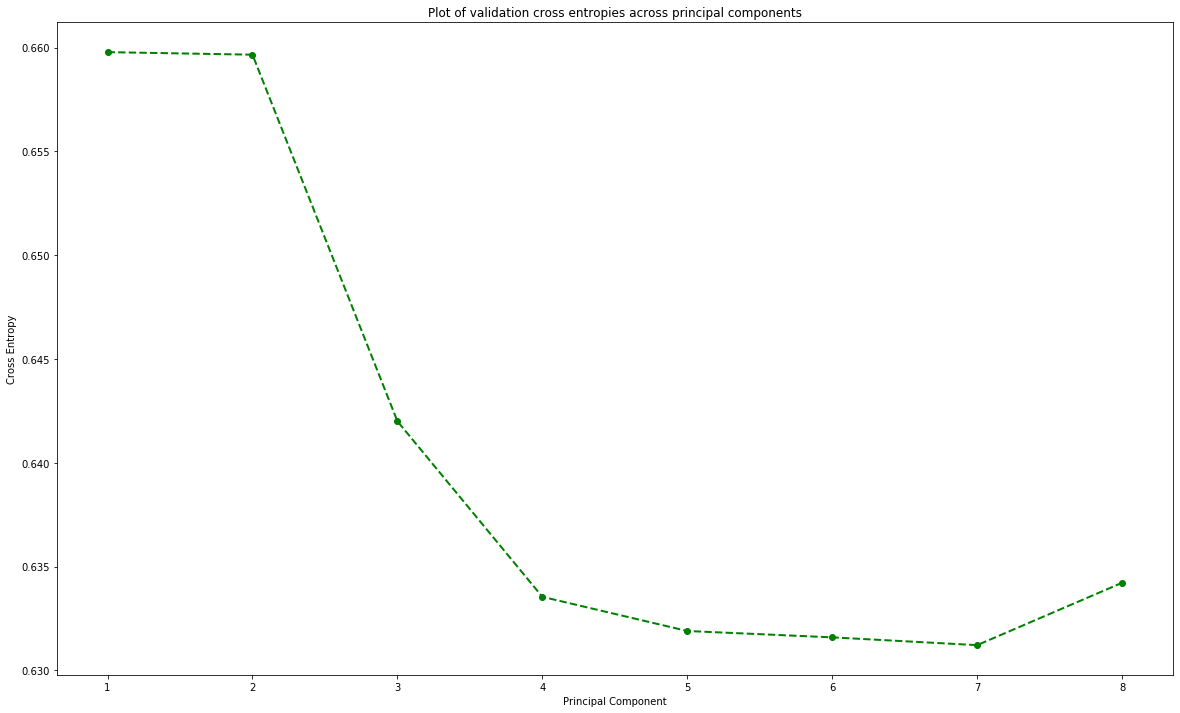

In [19]:
plt.figure(figsize=(20,12))
plt.title('Plot of validation cross entropies across principal components')
plt.plot(range(1,9),Cross_entropy_results,'go--', linewidth=2, markersize=6)
plt.xlabel('Principal Component')
plt.ylabel('Cross Entropy')

Looking at the table and graph above we see that q=7 has the lowest cross entropy loss on the validation set.

In [77]:
# Determine the cross entropy of the test set for q=7
Logistic = LogisticRegression()
Pca = PCA(n_components=7)
pipeline = Pipeline(steps=[('pca', pca), ('logistic', Logistic)])
fit = pipeline.fit(New_train.drop(columns=['loan_status']), New_train['loan_status'])
Prediction = pipeline.predict_proba(test.drop(columns=['loan_status']))
result = pd.DataFrame(Prediction, columns = ['0','1'])
Cross_Entropy = -sum([np.log(result[str(test['loan_status'].values[i])][i]) 
                     for i in range(len(test['loan_status']))])
Cross_Entropy=Cross_Entropy/test.shape[0]
print('PC7 Cross Entropy loss on the test set is')
Cross_Entropy

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


PC7 Cross Entropy loss on the test set is


0.6304649818419803

We also noticed that we could vary the average cross entropy loss by changing the ratio of defaulters to non defaulters in the training data set. If the training data is composed of fewer defaulters then the average cross entropy will decrease. However, we believed that it was more appropriate to train the logisitic classifier with a training data set with an equal proportion of defaulters and non defaulters. This was done to ensure that the misclassification rate was less than 50% so the logistic classifier would at least outperform guessing randomly.

## QUESTION 5: EXPLORE ALTERNATIVES TO PCA

### Pseudo Code
Set hidden layer Neurons p < q
<br>
Set Bias = b
<br>
Set hidden Layer number = l
<br>
Set output layer = q
<br>
Set random weights
<br>
Define Activation Function= w()
<br>
Define Sigmoid function = s()
<br>
Define Loss Function = L()
<br>
Propagate Forward:
<br>
For j = 1 … l do
<br>
	Propagate forward using s(w(x_j), b)
<br>
Obtain output  Y_out
<br>
Use Y_out for x of next iteration
<br>
Until Y_l
<br>
Then Compute Loss function L(Y_l, Y_actual)
<br>
Close loop
<br>
Backpropagate to Update weights:
<br>
For j = l…1 do
<br>
	Undo Activation Function
<br>
	Get gradients with respect to layer’s parameters
<br>
	Move on to next layer
<br>
	End loop
<br>
Propagate forward and backprop again until end of validation data

### If you were to train this model, what insights would you expect to gain relative to PCA?

Auto encoders are a neural network that has as an objective the replication of the input parameters using a hidden layer that has fewer neurons than the input parameters, in this case at not more than q-1 neurons. 
Rather than the output layer, what is of interest in this case is the parameter reduction of the hidden layer. Like PCA, the advantage of dimensionality reduction is displayed when using these reduced dimensions as parameters to classify unlabelled data as they tend to reduce the chance of training the model also on the noise of the training dataset. 
Unlike PCA, however, autoencoders have the capability to create reduced dimensions that can depend also on non-linear relationships of the parameters, this contrasts with PCA’s strictly linear relationships. 
This difference carries some advantages as well as disadvantages. Whilst the great limitation of only linear relationships is eliminated autoencoders like most neural network models are computationally expensive and hard to interpret. Also given the more scope for combining the several input factors into a reduced dimension, we run the risk of overfitting. This final consideration isn’t as impactful as the two because regularization can mitigate this drawback.
We can conclude therefore that whilst we might create Reduced dimensions that can explain the data better, this comes at the cost of higher computation power and lower (if not inexistent) interpretability. 


For each input x, 
Do a feed-forward pass to compute activations at all hidden layers, then at the output layer to obtain an output  
Measure the deviation of  from the input  (typically using squared error),
Backpropagate the error through the net and perform weight updates.
Principal components are the eigenvectros of the covariance matrix of the data and the eigenvectors are the corresponding eigenvectors say how much of the variation is explained by the PCA


## QUESTION 6: SEGMENT CONSUMERS USING CLUSTERING

In [23]:
# Use the functions provided in the lectures for get_means and get_closest
def get_means(labels,X,k):
    means = np.zeros((k,X.shape[1]))
    for c in range(k):
        points = X[labels == c]
        means[c,:] = points.mean(axis=0)
    return means
        
def get_closest(means,X,k):
    distances = np.zeros((X.shape[0],k))
    for c in range(k):
        diff = X.values - means[c,:]
        distances[:,c] = np.linalg.norm(diff,axis=1)**2
    labels = np.argmin(distances,axis=1)
    min_distance = np.min(distances,axis=1)
    return labels, min_distance

In [24]:
# Compute the squared difference for each value of K
# First define the data
# Preparing the data
new_data2 = pd.concat([data['loan_status'],data3],axis=1)
new_data2.columns = data.columns
new_data2 = new_data2.drop(['loan_status'],axis=1)
# Create blank dataframes to store results
lab = []
distance = []
# Then loop over the values of K
print('To reach loacal minimal for each value of K it took:')
for k in range(1,11):
    means = new_data2.sample(k,random_state = 5).values
    labels, _ = get_closest(means,new_data2,k)
    lab = []
    for i in range(200):
        means = get_means(labels,new_data2,k)
        new_labels, min_distance = get_closest(means,new_data2,k)
        lab.append(min_distance.sum())
        if (i >= 1 and abs(lab[i] -lab[i-1])<0.0000001):
            print('K = '+str(k)+', no. of re-labelling interations: '+str(i)+', and squared difference = '+str(lab[i]))
            distance.append(lab[i])
            break
        else:
            if (labels != new_labels).any():
                labels = new_labels


To reach loacal minimal for each value of K it took:
K = 1, no. of re-labelling interations: 1, and squared difference = 858080.0
K = 2, no. of re-labelling interations: 81, and squared difference = 726123.6473490845
K = 3, no. of re-labelling interations: 51, and squared difference = 654072.5944567254
K = 4, no. of re-labelling interations: 66, and squared difference = 603614.3610044428
K = 5, no. of re-labelling interations: 71, and squared difference = 568033.2902103636
K = 6, no. of re-labelling interations: 88, and squared difference = 535649.1044366726
K = 7, no. of re-labelling interations: 76, and squared difference = 514530.2973116166
K = 8, no. of re-labelling interations: 53, and squared difference = 498362.4995180367
K = 9, no. of re-labelling interations: 91, and squared difference = 483713.7698570394
K = 10, no. of re-labelling interations: 182, and squared difference = 470771.29372205626


## QUESTION 7: TUNE THE NUMBER OF CLUSTERS

In [25]:
distance

[858080.0,
 726123.6473490845,
 654072.5944567254,
 603614.3610044428,
 568033.2902103636,
 535649.1044366726,
 514530.2973116166,
 498362.4995180367,
 483713.7698570394,
 470771.29372205626]

(0, 11)

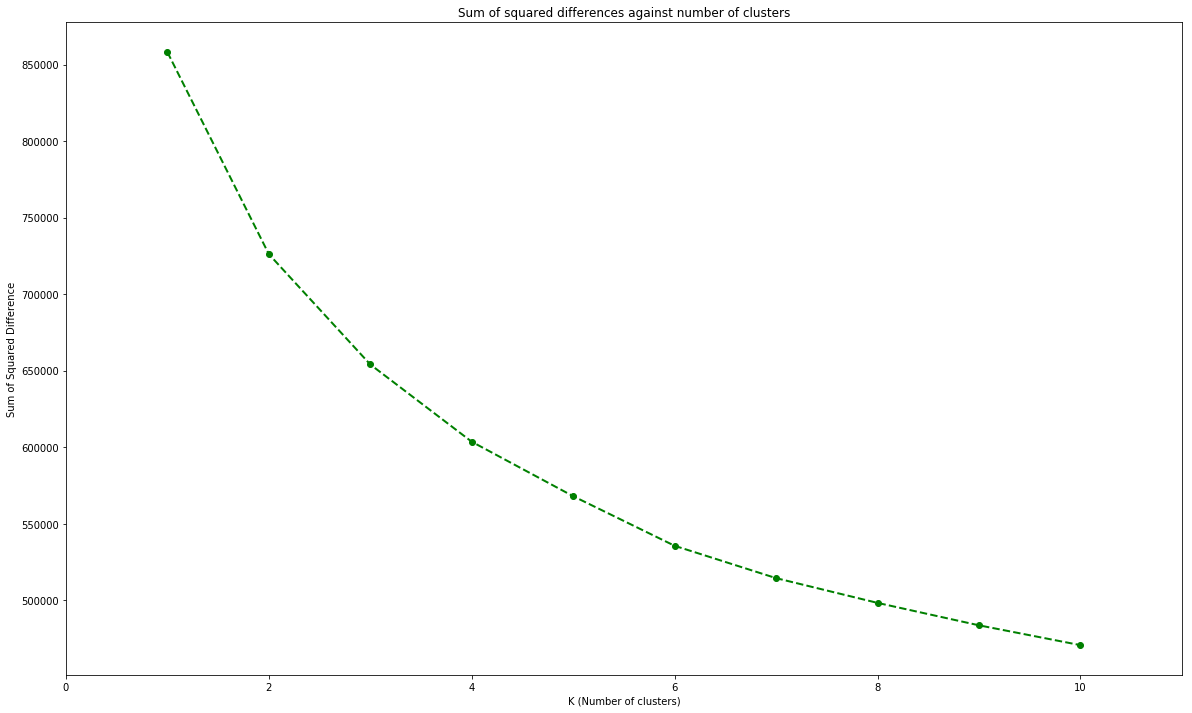

In [26]:
# First plot the sum squared differences for each value of K
plt.figure(figsize=(20,12))
X = [1,2,3,4,5,6,7,8,9,10]
plt.plot(X,distance,'go--', linewidth=2, markersize=6)
plt.xlabel('K (Number of clusters)')
plt.ylabel('Sum of Squared Difference')
plt.title('Sum of squared differences against number of clusters')
plt.xlim(0,11)

To determine a good number K* of clusters we plotted the sum of squared differences for each value of K against the respective K values. The graph above represents a graph of exponential decay. A good number of K* clusters would be one with a sufficiently low sum of squared differences (a low sum of squared differences would be a subjective criterion). After 6 clusters we note that the sum of squared difference decreases at a lower rate as K increases and we felt that the sum of squared differences was sufficiently low. Therefore we took the optimal number of clusters will be 6 after factoring in limitations on computing power. 

In [29]:
# Examining the characteristics of borrowers in each of the 7 clusters in terms of the first 2 principal components
# Preparing the data
new_data3 = pd.concat([data['loan_status'],data3],axis=1)
new_data3.columns = data.columns
new_data3 = new_data3.drop(['loan_status'],axis=1)
new_data3.head()

,loan_amnt,int_rate,annual_inc,avg_cur_bal,emp_length,fico_range_high,delinq_amnt,revol_util
0,0.935457,-0.046571,1.923776,1.276582,0.341514,-1.273577,-0.01253,1.117689
1,-0.562394,-0.668581,-0.330802,-0.664281,-0.704685,-1.133867,-0.01253,-0.033335
2,0.436173,-1.200615,3.753406,-0.065724,1.126164,-0.714737,-0.01253,-0.029352
3,1.135171,-0.572737,-0.165545,-0.403094,-0.704685,1.241201,-0.01253,-0.355940
4,-1.161534,-0.476892,0.389247,-0.693480,1.126164,-0.295608,-0.01253,-0.439579


In [32]:
# Obtaining information on characteristics for K = 6
K = 6
l = []
Means = new_data3.sample(K,random_state=5).values
Label, _ = get_closest(Means,new_data3,K)
for i in range(200):
    Means = get_means(Label,new_data3,K)
    New_Label, Min_Distance = get_closest(Means,new_data3,K)
    l.append(Min_Distance.sum())
    if (i >= 1 and abs(l[i]-l[i-1])<0.0000001):
        break
    else:
        if (Label !=New_Label).any():
            Label = New_Label
        

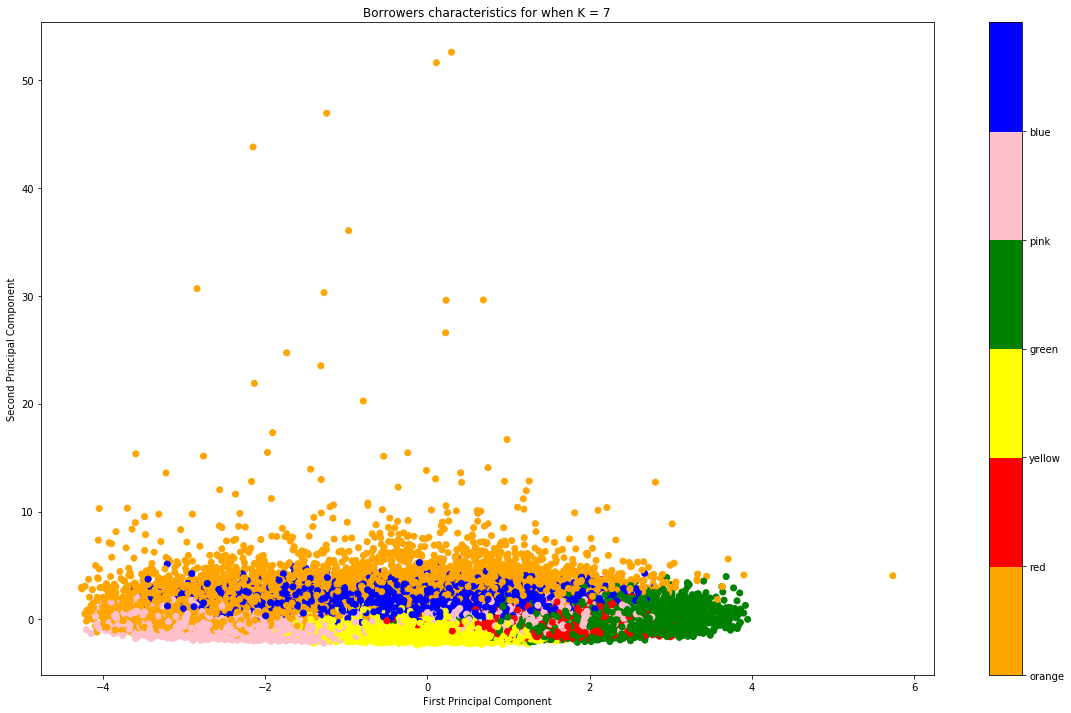

In [34]:
# Visualise the borrower's characteristics
pca2 = PCA(n_components=2).fit_transform(new_data3)
plt.figure(figsize=(20,12))
colors = ['orange','red','yellow','green','pink','blue']
plt.scatter(pca2[:,0],pca2[:,1],c=labels,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Borrowers characteristics for when K = 7')

# Plotting colorbars
cb = plt.colorbar()
loc = np.arange(0,max(labels),max(labels)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(colors)

1. The pink cluster represents borrowers with a relatively high FICO scores.
2. The green cluster represents borrowers with relatively high interest rates and revolving line utilization rates.
3. The yellow cluster represents borrowers with no salient characteristics in the first and second principal component directions but may have salient characteristics in other principal component directions.
4. The blue cluster represents borrowers with large variation in the first principal component direction e.g. widely different FICO scores, interest rates and revolving line utilization rate.
5. The orange cluster represents borrowers with relatively high loan amounts, annual income and average current balance over all borrower's accounts.
6. The red cluster represents borrowers with no salient characteristics in the first and second principal component directions but may have salient characteristics in other principal component directions.